# Principal Component Analysis - Facial Recognition

## Please read carefully all comments in order to fully understand this document.
## Notice that all the important shapes are printed in order to understand the dimenions of matrices.

## Dataset processing

#### Includes used by Python

In [10]:
import numpy as np 
import numpy.matlib
import pandas as pd 
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

#### Load dataset from .CSV file. The dataset is a matrix (400 x 4097): there are 400 images, each image is on a different line. Each image has the size of 64 * 64 = 4096. The 4097th column is the label column: the images correspunds to 40 people, the label is the person number. 

In [11]:
df = pd.read_csv('face_data.csv')
#pandas.DataFrame.nunique finds the unique elements(lines) of a dataset
df['target'].nunique()
#Print dataframe
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


#### The function plot_faces plots in a grid shape the first 30 images of the given matrix of pixels

In [12]:
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 10, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

#### X is the input (images), y is the output (labels)

In [13]:
# Drop the column 'target' from dataset in order to save just the images in X.
X = df.drop('target', axis=1)
Y = df['target']

#### Plot the images of the first 5 person from the dataset. Each person has 10 images.

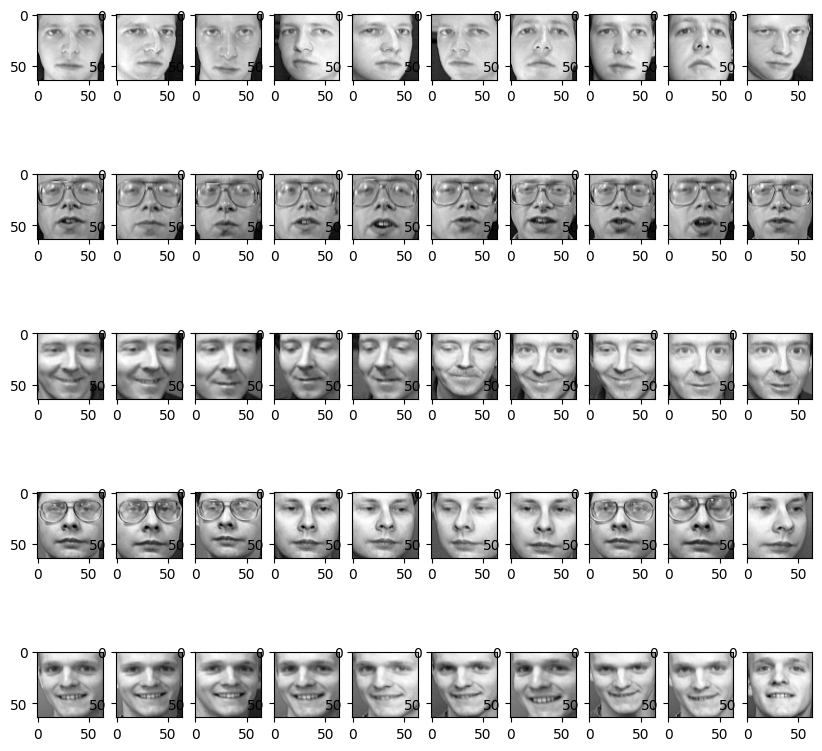

In [14]:
plot_faces(X)

#### Split the dataset in train / test. The train represents 75% of the dataset. The selected images are random, they are not in a specific order.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print('X_train shape is: ',X_train.values.shape)
print('Y_train shape is: ',Y_train.values.shape)
print('X_test shape is: ',X_test.values.shape)
print('Y_test shape is: ',Y_test.values.shape)

X_train shape is:  (300, 4096)
Y_train shape is:  (300,)
X_test shape is:  (100, 4096)
Y_test shape is:  (100,)


#### Plot some images from the training dataset. Notice that the images are no longer in order. They are now in random order. There are 300 images in the training dataset (75% of the entire dataset).

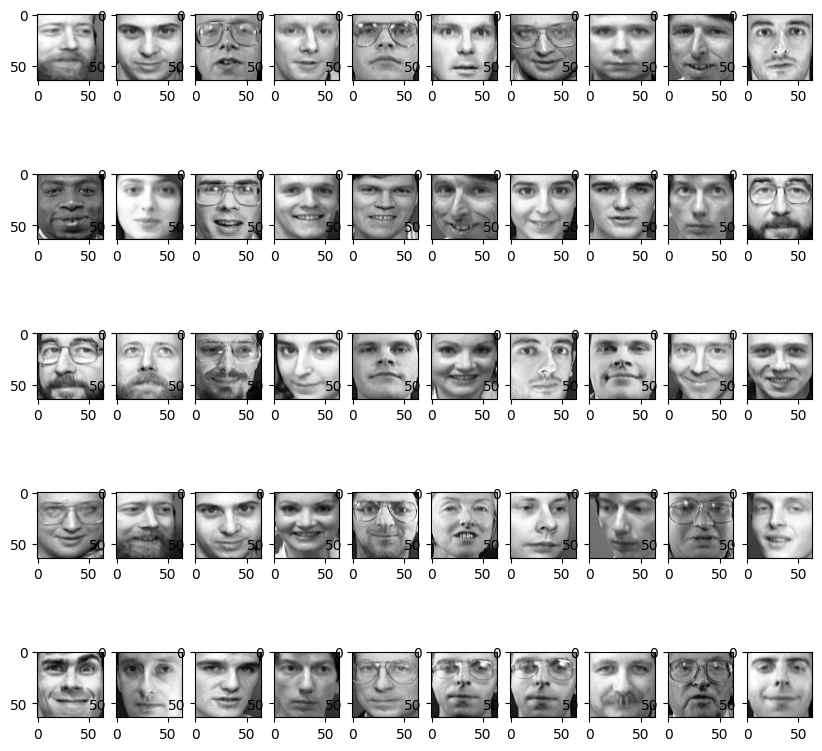

In [16]:
plot_faces(X_train)

## Training

#### Compute the mean value for each pixel coordinate. 64 * 64 size images => 4096 mean values, one for each coordinate
#### !Obs: We DO NOT compute the mean for each image resulting in a number of means equal to the number of images

mean shape:  (4096,)


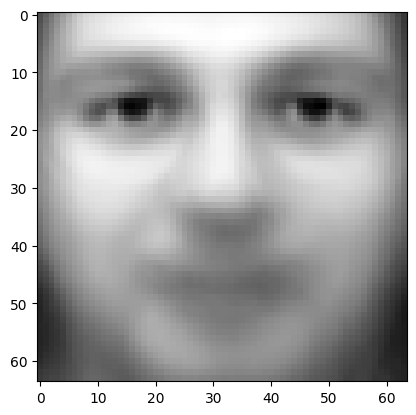

In [17]:
mean=X_train.mean(axis=0)
print('mean shape: ',mean.shape)
plt.imshow(np.array(mean).reshape(64, 64), cmap='gray')
plt.show()

#### The mean of each pixels coordinate is subtracted from the pixels from that coordinate from each image

In [18]:
# np.matlib.repmat duplicates the mean, which is a line of size 4096, 300 times
# to match the size of X_train
X_train_centered = X_train.values - np.matlib.repmat(mean,300,1)
print('X_train_centered shape: ',X_train_centered.shape)

X_train_centered shape:  (300, 4096)


#### The covariance matrix 'L' of matrix 'X_train_centered'  is computed. This matrix can be computed either by  multiplying 'X_train_centered' with its transpose, or by multiplying its transpose with it. The first method is choosed because a matrix of dimension NxM has at maximum min(N,M) non-zero eigenvalues. There is no reason to compute the bigger matrix.

In [19]:
# np.matmul computes the matrix multiplication
# np.transpose computes the transpose of the matrix
L=np.matmul(X_train_centered,np.transpose(X_train_centered))
# np.linalg.eig computes the eigenvalues as an array and the eigenvactors as a matrix
[eig_values,eig_vectors] = np.linalg.eig(L)
print('eig_values shape: ',eig_values.shape)
print('eig_vectors shape: ',eig_vectors.shape)

eig_values shape:  (300,)
eig_vectors shape:  (300, 300)


#### Sort the eigenvalues in descending order, then arrange the eigenvectors corresponding to the new order of eigenvalues.

In [20]:
keys=eig_values.copy().argsort()[::-1]
eig_vectors=[eig_vectors[i] for i in keys]
eig_vectors = np.array(eig_vectors)

#### Compute the comulative sum for each eigenvalues. This shows what percentage of the total number of eigenvalues have the first nth eigenvalues. The formula for the nth eigenvalue percentage is: sum (first nth eigenvalues) / sum (all eigenvalues)

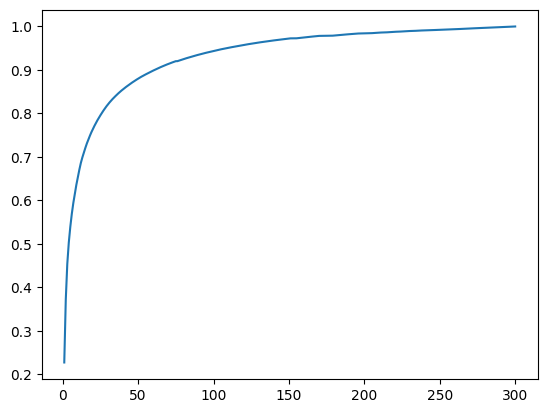

In [21]:
# eig_values_cumsum[-1] means the last element of the cumulative sum, which is in fact
# the sum of all eigenvalues
eig_values_cumsum=np.cumsum(eig_values)
plt.plot(range(1,301),eig_values_cumsum/eig_values_cumsum[-1])

#### The first 'number_of_eig_values' eigenvalues are selected. The number of selected eigenvalues gives the percent of information that is retained.

In [22]:
number_of_eig_values=107
eig_vectors_selected = eig_vectors[0:number_of_eig_values]
print('eig_vectors_selected shape: ',eig_vectors_selected.shape)

eig_vectors_selected shape:  (107, 300)


#### The eigenfaces are computed by multiplying the X_train_centered matrix with the eig_vectors_selected matrix

In [23]:
Eigenfaces=np.matmul(np.transpose(X_train_centered), np.transpose(eig_vectors_selected))
print('Eigenfaces shape: ',Eigenfaces.shape)

Eigenfaces shape:  (4096, 107)


### Plot the eigenfaces

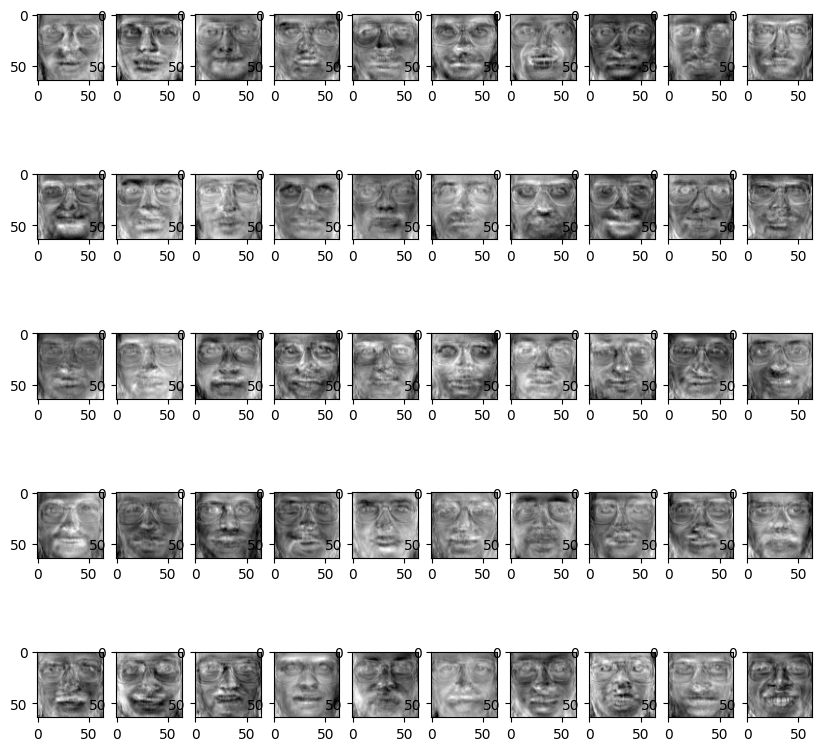

In [24]:
plot_faces(np.transpose(Eigenfaces))

#### The projection of the train images on the eigenfaces space is computed by multiplying the Eigenfaces matrix with X_train_centered

In [25]:
ProjectedImages = np.matmul(np.transpose(Eigenfaces), np.transpose(X_train_centered))
print('ProjectedImages shape: ',ProjectedImages.shape)

ProjectedImages shape:  (107, 300)


## Testing 

#### A random test image is selected from the test dataset (X_test). The image is centered by subtracting from it the mean array that was computed on the training phase.
#### Notice that the tested image is not included in the training set.

X_test shape:  (100, 4096)
The chosen image is:


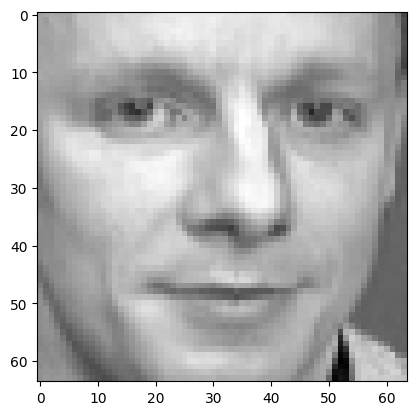

In [26]:
random_index = random.randint(0,99)
X_test_centered = X_test.values[random_index] - mean
print('X_test shape: ',X_test.values.shape)
plt.imshow(np.array(X_test)[random_index].reshape(64, 64), cmap='gray')
print('The chosen image is:')


#### The projection of the test image on the eigenfaces space is computed by multiplying the Eigenfaces matrix with the new image. Similar to the projections computed on training phase

In [27]:
X_test_projection = np.matmul(np.transpose(Eigenfaces),np.transpose(X_test_centered))
print('X_test_projection shape: ',X_test_projection.shape)

X_test_projection shape:  (107,)


#### The projection of the test image is compared with the projections that were compted on the training phase. This comparation is made with the Euclidean distance between  the test image projection and each of the training images projection. The projection with the smallest distance from the projection of the test image represents the most similar image to the test image. The training being 75% of the dataset, that means that there are 300 images for training, so there will be 300 distances to chose from.

In [28]:
Euc_dist = ProjectedImages - np.transpose(np.matlib.repmat(X_test_projection,300,1))
Euc_dist = np.square(np.linalg.norm(Euc_dist,axis=0))
print('Euc_dist shape: ',Euc_dist.shape)

Euc_dist shape:  (300,)


#### The index of the minimum distance is extracted. The index is a natural number from 0 to 300 (75% of the entire dataset).

In [29]:
minimum_index = np.argmin(Euc_dist)

#### The label of the test image is compared with the label of the image with the minimum distance

Tested person was labeled:  20
Found person was labeled:  20


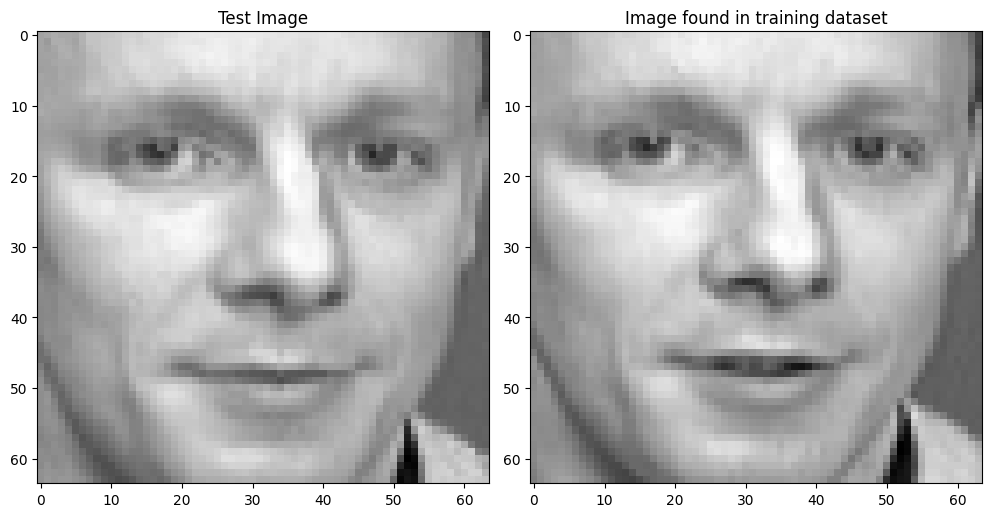

In [30]:
print('Tested person was labeled: ',Y_test.values[random_index])
print('Found person was labeled: ',Y_train.values[minimum_index])
f, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.array(X_test)[random_index].reshape(64, 64), cmap='gray')
ax[1].imshow(np.array(X_train)[minimum_index].reshape(64, 64), cmap='gray')
ax[0].set_title('Test Image')
ax[1].set_title('Image found in training dataset')
f.tight_layout(pad=1.0)

### In order to test a new image run again all the cells beggining from Testing